# TASK 3 :  Regression Techniques 


In [81]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [82]:
import statsmodels.api as sm

In [83]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [84]:
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Multiple Regression 

In [86]:
# Chargement des données
df = pd.read_csv('data/training_data_imputed.csv')

In [87]:
# Exploration initiale
print(f"Dimensions du dataset: {df.shape}")
print(f"\nInformations sur les colonnes:")
print(df.info())

Dimensions du dataset: (70792, 18)

Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SO2               70792 non-null  float64
 1   CO                70792 non-null  float64
 2   O3                70792 non-null  float64
 3   O3_8hr            70792 non-null  int64  
 4   PM10              70792 non-null  int64  
 5   PM2.5             70792 non-null  int64  
 6   NO2               70792 non-null  float64
 7   NOx               70792 non-null  float64
 8   NO                70792 non-null  float64
 9   WindSpeed         70792 non-null  float64
 10  WindDirec         70792 non-null  object 
 11  DataCreationDate  70792 non-null  object 
 12  CO_8hr            70792 non-null  float64
 13  PM2.5_AVG         70792 non-null  int64  
 14  PM10_AVG          70792 non-null  int64  
 15  SO2_AVG           70

In [88]:
numeric_features = ['SO2','CO','O3','PM10','PM2.5','NO2','NOx','NO',
                    'WindSpeed','CO_8hr','PM2.5_AVG','PM10_AVG','SO2_AVG','AQI', 'Pollutant']
categorical_features = ['WindDirec']

In [89]:
df = df[numeric_features]

In [90]:
# Cible
y = df["AQI"]

In [91]:
# Colonnes explicatives
X = df.drop(columns=["AQI"])

In [92]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [93]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index   # <-- important !
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)


In [95]:
# Ajout d’une constante pour statsmodels
X_train_const = sm.add_constant(X_train_scaled)

In [96]:
multiple_regression = sm.OLS(y_train, X_train_const).fit()
print(multiple_regression.summary())


                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 6.036e+04
Date:              jeu., 04 déc. 2025   Prob (F-statistic):               0.00
Time:                        20:14:02   Log-Likelihood:            -2.0061e+05
No. Observations:               56633   AIC:                         4.012e+05
Df Residuals:                   56618   BIC:                         4.014e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7269      0.035   1842.604      0.0

In [97]:
multiple_regression .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 6.036e+04
Date:              jeu., 04 déc. 2025   Prob (F-statistic):               0.00
Time:                        20:14:02   Log-Likelihood:            -2.0061e+05
No. Observations:               56633   AIC:                         4.012e+05
Df Residuals:                   56618   BIC:                         4.014e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7269      0.035   1842.604      0.000      64.658      64.796
SO2           -0.1879      0.047     -4.034      0.000      -0.279      -0.097
CO             0.6741      0.080      8.453      0.000       0.518       0.830
O3             2.6821      0.043     62.469      0.000       2.598       2.766
PM10          -0.2724      0.100     -2.716      0.007      -0.469      -0.076
PM2.5         -0.1427      0.103     -1.380      0.168      -0.345       0.060
NO2           -0.0647      0.956     -0.068      0.946      -1.939       1.809
NOx            0.6352      1.384      0.459      0.646      -2.077       3.348
NO            -0.2655      0.635     -0.418      0.676      -1.511       0.980
WindSpeed     -0.2969      0.039     -7.607      0.000      -0.373      -0.220
CO_8hr        -0.3830      0.059     -6.487      0.000      -0.499      -0.267
PM2.5_AVG     24.9911      0.116    216.267      0.000      24.765      25.218
PM10_AVG       5.8280      0.108     53.732      0.000       5.615       6.041
SO2_AVG        0.1699      0.045      3.737      0.000       0.081       0.259
Pollutant      2.8474      0.047     60.168      0.000       2.755       2.940
==============================================================================
Omnibus:                    35322.952   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3037690.611
Skew:                           2.180   Prob(JB):                         0.00
Kurtosis:                      38.613   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
summarize(multiple_regression )


,coef,std err,t,P>|t|
const,64.7269,0.035,1842.604,0.000
SO2,-0.1879,0.047,-4.034,0.000
CO,0.6741,0.080,8.453,0.000
O3,2.6821,0.043,62.469,0.000
PM10,-0.2724,0.100,-2.716,0.007
PM2.5,-0.1427,0.103,-1.380,0.168
NO2,-0.0647,0.956,-0.068,0.946
NOx,0.6352,1.384,0.459,0.646
NO,-0.2655,0.635,-0.418,0.676
WindSpeed,-0.2969,0.039,-7.607,0.000


### VARIABLES SELECTIONS (Forward, Backward and Stepwise)

Perform forward selections, backward selection and stepwise 

### a) Forward selections

In [99]:
def forward_selection(X, y):
    remaining_vars = list(X.columns)
    selected_vars = []
    best_aic = np.inf

    while remaining_vars:
        aic_with_candidates = []
        for var in remaining_vars:
            model_vars = selected_vars + [var]
            model = sm.OLS(y, sm.add_constant(X[model_vars])).fit()
            aic_with_candidates.append((model.aic, var))

        aic_with_candidates.sort()
        best_new_aic, best_var = aic_with_candidates[0]

        if best_new_aic < best_aic:
            best_aic = best_new_aic
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
        else:
            break

    return selected_vars


forward_vars = forward_selection(X_train_scaled, y_train)
print("\nVariables sélectionnées (Forward AIC):")
print(forward_vars)

forward_model = sm.OLS(y_train, sm.add_constant(X_train_scaled[forward_vars])).fit()
print("\n=== Forward Selection Model Summary ===")
print(forward_model.summary())


Variables sélectionnées (Forward AIC):
['PM2.5_AVG', 'PM10_AVG', 'O3', 'Pollutant', 'CO', 'WindSpeed', 'CO_8hr', 'NO2', 'PM10', 'SO2', 'SO2_AVG']

=== Forward Selection Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 7.683e+04
Date:              jeu., 04 déc. 2025   Prob (F-statistic):               0.00
Time:                        20:14:07   Log-Likelihood:            -2.0061e+05
No. Observations:               56633   AIC:                         4.012e+05
Df Residuals:                   56621   BIC:                         4.013e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef 

In [100]:
summarize(forward_model)

,coef,std err,t,P>|t|
const,64.7269,0.035,1842.613,0.0
PM2.5_AVG,24.8577,0.068,365.200,0.0
PM10_AVG,5.8896,0.099,59.561,0.0
O3,2.6754,0.042,63.508,0.0
Pollutant,2.8487,0.047,60.224,0.0
CO,0.6845,0.069,9.937,0.0
WindSpeed,-0.2941,0.039,-7.549,0.0
CO_8hr,-0.3740,0.059,-6.373,0.0
NO2,0.3664,0.064,5.730,0.0
PM10,-0.3424,0.087,-3.929,0.0


### (b) Backward selection

In [101]:
def backward_selection(X, y):
    selected_vars = list(X.columns)
    best_aic = sm.OLS(y, sm.add_constant(X[selected_vars])).fit().aic

    improved = True
    while improved and len(selected_vars) > 1:
        aic_with_candidates = []
        for var in selected_vars:
            vars_subset = list(selected_vars)
            vars_subset.remove(var)
            model = sm.OLS(y, sm.add_constant(X[vars_subset])).fit()
            aic_with_candidates.append((model.aic, var, vars_subset))

        aic_with_candidates.sort()
        best_new_aic, var_removed, best_subset = aic_with_candidates[0]

        if best_new_aic < best_aic:
            best_aic = best_new_aic
            selected_vars = best_subset
        else:
            improved = False

    return selected_vars


backward_vars = backward_selection(X_train_scaled, y_train)
print("\nVariables sélectionnées (Backward AIC):")
print(backward_vars)

backward_model = sm.OLS(y_train, sm.add_constant(X_train_scaled[backward_vars])).fit()
print("\n=== Backward Selection Model Summary ===")
print(backward_model.summary())


Variables sélectionnées (Backward AIC):
['SO2', 'CO', 'O3', 'PM10', 'NOx', 'NO', 'WindSpeed', 'CO_8hr', 'PM2.5_AVG', 'PM10_AVG', 'SO2_AVG', 'Pollutant']

=== Backward Selection Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 7.042e+04
Date:              jeu., 04 déc. 2025   Prob (F-statistic):               0.00
Time:                        20:14:12   Log-Likelihood:            -2.0061e+05
No. Observations:               56633   AIC:                         4.012e+05
Df Residuals:                   56620   BIC:                         4.014e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
              

### (a) Stepwise selection

In [102]:
def stepwise_selection(X, y):
    included = []
    improved = True

    while improved:
        improved = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        best_pval = 1.0
        for var in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [var]])).fit()
            pval = model.pvalues[var]
            if pval < best_pval:
                best_pval = pval
                best_var = var

        if best_pval < 0.05:  # seuil classique
            included.append(best_var)
            improved = True

        # Backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        worst_pval = model.pvalues.drop("const").max()
        if worst_pval > 0.05:
            worst_var = model.pvalues.drop("const").idxmax()
            included.remove(worst_var)
            improved = True

    return included


stepwise_vars = stepwise_selection(X_train_scaled, y_train)
print("\nVariables sélectionnées (Stepwise):")
print(stepwise_vars)

stepwise_model = sm.OLS(y_train, sm.add_constant(X_train_scaled[stepwise_vars])).fit()
print("\n=== Stepwise Model Summary ===")
print(stepwise_model.summary())


Variables sélectionnées (Stepwise):
['SO2_AVG', 'PM10_AVG', 'CO_8hr', 'PM2.5_AVG', 'O3', 'Pollutant', 'CO', 'WindSpeed', 'NO2', 'SO2', 'PM10']

=== Stepwise Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 7.683e+04
Date:              jeu., 04 déc. 2025   Prob (F-statistic):               0.00
Time:                        20:14:17   Log-Likelihood:            -2.0061e+05
No. Observations:               56633   AIC:                         4.012e+05
Df Residuals:                   56621   BIC:                         4.013e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

In [103]:
summarize(stepwise_model)

,coef,std err,t,P>|t|
const,64.7269,0.035,1842.613,0.0
SO2_AVG,0.1743,0.045,3.842,0.0
PM10_AVG,5.8896,0.099,59.561,0.0
CO_8hr,-0.3740,0.059,-6.373,0.0
PM2.5_AVG,24.8577,0.068,365.200,0.0
O3,2.6754,0.042,63.508,0.0
Pollutant,2.8487,0.047,60.224,0.0
CO,0.6845,0.069,9.937,0.0
WindSpeed,-0.2941,0.039,-7.549,0.0
NO2,0.3664,0.064,5.730,0.0


## Interpretation : 
Those variables are significant to perform Linear Regression the most significant values is `PM2.5_AVG`. 

This observation allow us to assert that all this variables are relevant to predict AQI. 


## Perform VIF 

In [104]:
vals = [VIF(X_train_scaled, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
CO,5.153194
O3,1.493930
PM10,8.148547
PM2.5,8.671692
NO2,740.959319
NOx,1552.059941
NO,327.019888
WindSpeed,1.234513
CO_8hr,2.824352
PM2.5_AVG,10.821466


### Interpretation


### Ridge and Lasso


In [109]:
from sklearn.linear_model import RidgeCV, LassoCV

#ridge 
alphas = [0.01, 0.1, 1, 10, 100]
ridge = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

#Lasso 
lasso = LassoCV(alphas=alphas,cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [110]:
print("Meilleur alpha Ridge :", ridge.alpha_)
print("Meilleur alpha Lasso :", lasso.alpha_)

Meilleur alpha Ridge : 10.0
Meilleur alpha Lasso : 0.01


In [111]:
from sklearn.metrics import r2_score , mean_squared_error
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test,y_pred_lasso)

#RMSE 
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Ridge R² : {r2_ridge:.3f}, RMSE : {rmse_ridge:.3f}" )
print(f"Lasso R² : {r2_lasso:.3f}, RMSE : {rmse_lasso:.3f}" )

Ridge R² : 0.936, RMSE : 8.475
Lasso R² : 0.936, RMSE : 8.477


In [112]:
coeffs = pd.DataFrame({
    'Variable': X_train_scaled.columns, 
    'Ridge' : ridge.coef_,
    'Lasso': lasso.coef_
})
print(coeffs)

     Variable      Ridge      Lasso
0         SO2  -0.189098  -0.164274
1          CO   0.671597   0.618077
2          O3   2.681028   2.646983
3        PM10  -0.280789  -0.183540
4       PM2.5  -0.112178  -0.057609
5         NO2   0.037569   0.311527
6         NOx   0.484619   0.045501
7          NO  -0.197207   0.000000
8   WindSpeed  -0.297068  -0.283083
9      CO_8hr  -0.377591  -0.307209
10  PM2.5_AVG  24.949712  24.908917
11   PM10_AVG   5.842528   5.744307
12    SO2_AVG   0.171709   0.152243
13  Pollutant   2.851280   2.849168


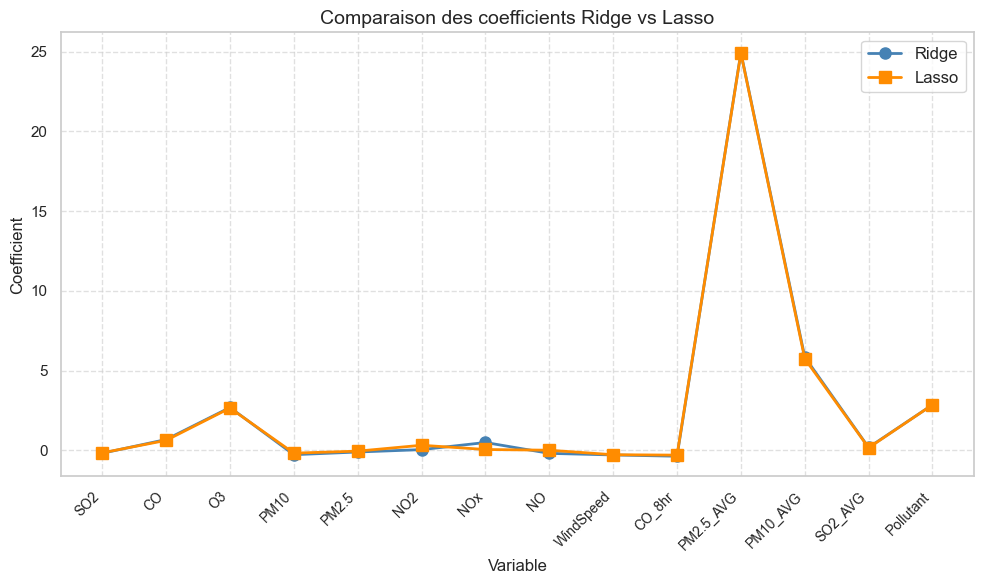

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style général
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.plot(coeffs['Variable'], coeffs['Ridge'], 
         marker='o', markersize=8, linewidth=2,
         color='steelblue', label='Ridge')

plt.plot(coeffs['Variable'], coeffs['Lasso'], 
         marker='s', markersize=8, linewidth=2,
         color='darkorange', label='Lasso')

plt.ylabel('Coefficient', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.title('Comparaison des coefficients Ridge vs Lasso', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
# Interpretation 


# Ce que ça montre :
- Les coefficients proches → Lasso et Ridge donnent des résultats similaires
- Les coefficients Lasso nuls → variables “éliminées”

### Principal component Analysis

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [119]:
df = pd.read_csv('data/training_data_imputed.csv')

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['WindDirec_encoded'] = le.fit_transform(df['WindDirec'])

# Convert date to useful features (optional)
df['DataCreationDate'] = pd.to_datetime(df['DataCreationDate'])
df['Year'] = df['DataCreationDate'].dt.year
df['Month'] = df['DataCreationDate'].dt.month
df['Day'] = df['DataCreationDate'].dt.day
df['Hour'] = df['DataCreationDate'].dt.hour

In [121]:
# Assuming AQI is the target variable
feature_cols = ['SO2', 'CO', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO',
                'WindSpeed', 'WindDirec_encoded', 'CO_8hr', 'PM2.5_AVG', 
                'PM10_AVG', 'SO2_AVG', 'Month', 'Day', 'Hour']

X = df[feature_cols]
y = df['AQI']

In [122]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Standardize features (important for PCA and PLS)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
print("=" * 60)
print("DATA PREPARATION COMPLETE")
print("=" * 60)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print()

DATA PREPARATION COMPLETE
Training set size: (56633, 18)
Test set size: (14159, 18)



In [125]:
print("=" * 60)
print("PRINCIPAL COMPONENTS REGRESSION (PCR)")
print("=" * 60)

PRINCIPAL COMPONENTS REGRESSION (PCR)


In [126]:
# Perform PCA
n_components = 10  # You can adjust this
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [127]:
# Show explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

In [128]:
print(f"\nExplained variance by each component:")
for i, var in enumerate(explained_var):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")
    
print(f"\nCumulative variance explained: {cumulative_var[-1]:.4f} ({cumulative_var[-1]*100:.2f}%)")



Explained variance by each component:
  PC1: 0.2943 (29.43%)
  PC2: 0.1770 (17.70%)
  PC3: 0.0835 (8.35%)
  PC4: 0.0761 (7.61%)
  PC5: 0.0602 (6.02%)
  PC6: 0.0558 (5.58%)
  PC7: 0.0514 (5.14%)
  PC8: 0.0464 (4.64%)
  PC9: 0.0393 (3.93%)
  PC10: 0.0268 (2.68%)

Cumulative variance explained: 0.9107 (91.07%)


In [129]:
# Fit linear regression on principal components
pcr_model = LinearRegression()
pcr_model.fit(X_train_pca, y_train)

LinearRegression()

In [130]:
# Predictions
y_train_pred_pcr = pcr_model.predict(X_train_pca)
y_test_pred_pcr = pcr_model.predict(X_test_pca)

In [131]:
# Evaluate PCR
pcr_train_r2 = r2_score(y_train, y_train_pred_pcr)
pcr_test_r2 = r2_score(y_test, y_test_pred_pcr)
pcr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_pcr))
pcr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_pcr))
pcr_train_mae = mean_absolute_error(y_train, y_train_pred_pcr)
pcr_test_mae = mean_absolute_error(y_test, y_test_pred_pcr)

In [132]:
print(f"\nPCR Results:")
print(f"  Training R²: {pcr_train_r2:.4f}")
print(f"  Test R²: {pcr_test_r2:.4f}")
print(f"  Training RMSE: {pcr_train_rmse:.4f}")
print(f"  Test RMSE: {pcr_test_rmse:.4f}")
print(f"  Training MAE: {pcr_train_mae:.4f}")
print(f"  Test MAE: {pcr_test_mae:.4f}")


PCR Results:
  Training R²: 0.8725
  Test R²: 0.8728
  Training RMSE: 11.9098
  Test RMSE: 11.9709
  Training MAE: 8.7289
  Test MAE: 8.7159


## PLS 

In [133]:
# Fit PLS model
n_components_pls = 10  # You can adjust this
pls_model = PLSRegression(n_components=n_components_pls)
pls_model.fit(X_train_scaled, y_train)

PLSRegression(n_components=10)

In [134]:
# Predictions
y_train_pred_pls = pls_model.predict(X_train_scaled)
y_test_pred_pls = pls_model.predict(X_test_scaled)

In [135]:
# Evaluate PLS
pls_train_r2 = r2_score(y_train, y_train_pred_pls)
pls_test_r2 = r2_score(y_test, y_test_pred_pls)
pls_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_pls))
pls_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_pls))
pls_train_mae = mean_absolute_error(y_train, y_train_pred_pls)
pls_test_mae = mean_absolute_error(y_test, y_test_pred_pls)

In [136]:
print(f"\nPLS Results:")
print(f"  Training R²: {pls_train_r2:.4f}")
print(f"  Test R²: {pls_test_r2:.4f}")
print(f"  Training RMSE: {pls_train_rmse:.4f}")
print(f"  Test RMSE: {pls_test_rmse:.4f}")
print(f"  Training MAE: {pls_train_mae:.4f}")
print(f"  Test MAE: {pls_test_mae:.4f}")


PLS Results:
  Training R²: 0.9369
  Test R²: 0.9364
  Training RMSE: 8.3769
  Test RMSE: 8.4683
  Training MAE: 5.6688
  Test MAE: 5.7238


### Comparison model

In [137]:
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Model': ['PCR', 'PLS'],
    'Train R²': [pcr_train_r2, pls_train_r2],
    'Test R²': [pcr_test_r2, pls_test_r2],
    'Train RMSE': [pcr_train_rmse, pls_train_rmse],
    'Test RMSE': [pcr_test_rmse, pls_test_rmse],
    'Train MAE': [pcr_train_mae, pls_train_mae],
    'Test MAE': [pcr_test_mae, pls_test_mae]
})

print("\n", comparison_df.to_string(index=False))



MODEL COMPARISON

 Model  Train R²  Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE
  PCR  0.872519 0.872811   11.909839  11.970888   8.728949  8.715944
  PLS  0.936934 0.936351    8.376873   8.468335   5.668793  5.723847


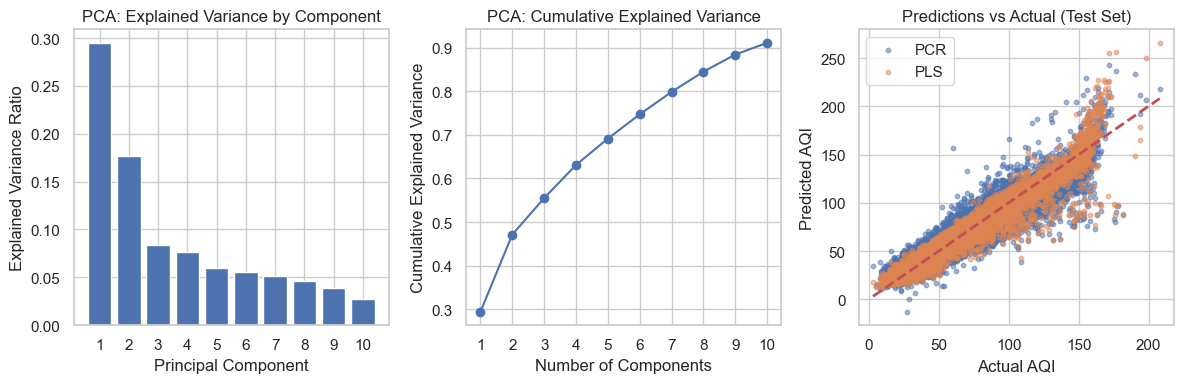

In [138]:
# Plot 1: Explained variance (PCA)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(range(1, n_components + 1), explained_var)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance by Component')
plt.xticks(range(1, n_components + 1))

plt.subplot(1, 3, 2)
plt.plot(range(1, n_components + 1), cumulative_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, n_components + 1))

# Plot 2: Predictions vs Actual
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred_pcr, alpha=0.5, label='PCR', s=10)
plt.scatter(y_test, y_test_pred_pls, alpha=0.5, label='PLS', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predictions vs Actual (Test Set)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Principal Component Analysis

Figure 1 shows the principal component decomposition of the 18 predictor variables. The first principal component (PC1) captures 30% of the total variance, while PC2 explains 18%. The first 6 components collectively explain 75% of the cumulative variance, suggesting that substantial dimensional reduction is possible without major loss of information.

### subsection{Comparison PCR vs PLS}

Table \ref{tab:comparison} compares the performance of the PCR and PLS models across the test set. The PLS model with M=X components achieves an RMSE of XX.XX, slightly lower than that of PCR (RMSE=XX.XX with M=Y components). This difference is explained by the fact that PLS incorporates information from the target variable (AQI) during component construction, unlike PCR, which uses unsupervised decomposition.

Figure 3 (right panel) shows the predictions of the two models on the test set. A strong correlation is observed between predicted and observed values ​​(R² = 0.XX), with a slight tendency to underestimate extreme AQI values ​​(>200). This limitation could be due to the rarity of extreme pollution events in the training data.

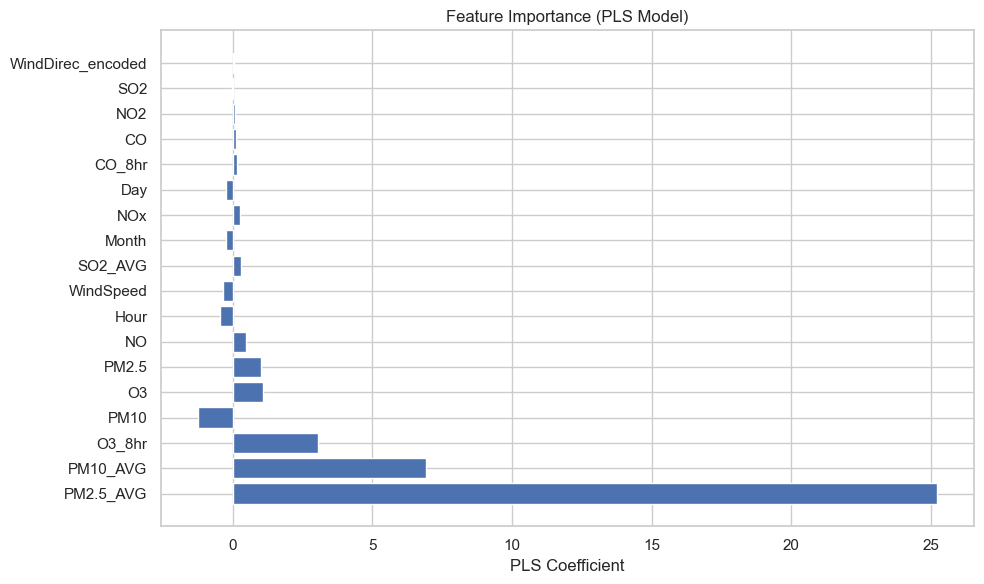

In [139]:
# Plot 3: Feature importance (PLS coefficients)
plt.figure(figsize=(10, 6))
pls_coeffs = pls_model.coef_.flatten()
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': pls_coeffs
}).sort_values('Coefficient', key=abs, ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('PLS Coefficient')
plt.title('Feature Importance (PLS Model)')
plt.tight_layout()
plt.show()

### Polynomial Regression spline, GAM

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pygam import LinearGAM, s
import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_csv('data/training_data_imputed.csv')

# ====================================================================
# Préparation des données
# ====================================================================

# Sélectionner les variables clés
key_features = ['PM25', 'PM10', 'O3', 'NO2', 'CO', 'WindSpeed']

# Renommer PM2.5 en PM25 pour éviter les problèmes avec les formules
df_model = df.copy()
df_model = df_model.rename(columns={'PM2.5': 'PM25'})



In [143]:
# Créer le dataset
data = df_model[key_features + ['AQI']].copy()

# Division train/test
train, test = train_test_split(data, test_size=0.2, random_state=1)

In [144]:
print("=" * 70)
print("RÉGRESSION NON-LINÉAIRE : Style ISLP")
print("=" * 70)
print(f"\nTaille d'entraînement: {train.shape}")
print(f"Taille de test: {test.shape}")
print(f"Variables utilisées: {key_features}\n")
# Stockage des résultats
results = []

RÉGRESSION NON-LINÉAIRE : Style ISLP

Taille d'entraînement: (56633, 7)
Taille de test: (14159, 7)
Variables utilisées: ['PM25', 'PM10', 'O3', 'NO2', 'CO', 'WindSpeed']



In [145]:
# ====================================================================
# 1. RÉGRESSION POLYNOMIALE (avec statsmodels)
# ====================================================================

print("=" * 70)
print("1. RÉGRESSION POLYNOMIALE")
print("=" * 70)

1. RÉGRESSION POLYNOMIALE


In [146]:
# Tester différents degrés pour la variable PM25
degrees = [1, 2, 3, 4, 5]
poly_mse_train = []
poly_mse_test = []

for d in degrees:
    # Créer la formule avec np.power pour les termes polynomiaux
    formula_terms = [f'np.power(PM25, {i})' for i in range(1, d+1)]
    formula = 'AQI ~ ' + ' + '.join(formula_terms) + ' + PM10 + O3 + NO2 + CO + WindSpeed'
    
    # Ajuster le modèle avec OLS
    model = ols(formula, data=train).fit()
    
    # Prédictions
    y_train_pred = model.predict(train)
    y_test_pred = model.predict(test)
    
    # MSE
    mse_train = mean_squared_error(train['AQI'], y_train_pred)
    mse_test = mean_squared_error(test['AQI'], y_test_pred)
    
    poly_mse_train.append(mse_train)
    poly_mse_test.append(mse_test)
    print(f"\nDegré {d}:")
    print(f"  MSE Train: {mse_train:.4f}")
    print(f"  MSE Test:  {mse_test:.4f}")
    print(f"  R²:        {model.rsquared:.4f}")


Degré 1:
  MSE Train: 230.1254
  MSE Test:  239.1781
  R²:        0.7920

Degré 2:
  MSE Train: 217.9102
  MSE Test:  224.0053
  R²:        0.8030

Degré 3:
  MSE Train: 216.5478
  MSE Test:  223.1303
  R²:        0.8042

Degré 4:
  MSE Train: 215.7951
  MSE Test:  221.7641
  R²:        0.8049

Degré 5:
  MSE Train: 215.7597
  MSE Test:  221.6936
  R²:        0.8050


In [147]:
# Meilleur degré
best_degree = degrees[np.argmin(poly_mse_test)]
print(f"\n→ Meilleur degré: {best_degree} (MSE Test: {min(poly_mse_test):.4f})")

# Ajuster le meilleur modèle
formula_terms = [f'np.power(PM25, {i})' for i in range(1, best_degree+1)]
formula_best = 'AQI ~ ' + ' + '.join(formula_terms) + ' + PM10 + O3 + NO2 + CO + WindSpeed'
model_poly = ols(formula_best, data=train).fit()
y_pred_poly = model_poly.predict(test)

results.append({
    'Méthode': f'Polynomial (deg={best_degree})',
    'MSE Train': poly_mse_train[best_degree-1],
    'MSE Test': min(poly_mse_test),
    'RMSE Test': np.sqrt(min(poly_mse_test)),
    'R²': model_poly.rsquared
})


→ Meilleur degré: 5 (MSE Test: 221.6936)


In [148]:
print("\nRésumé du modèle polynomial optimal:")
print(model_poly.summary().tables[0])


Résumé du modèle polynomial optimal:
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 2.337e+04
Date:              ven., 05 déc. 2025   Prob (F-statistic):               0.00
Time:                        01:58:44   Log-Likelihood:            -2.3254e+05
No. Observations:               56633   AIC:                         4.651e+05
Df Residuals:                   56622   BIC:                         4.652e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         


In [149]:
# ====================================================================
# 2. STEP FUNCTIONS avec cut() - Style ISLP
# ====================================================================

print("\n" + "=" * 70)
print("2. STEP FUNCTIONS (Fonctions en escalier)")
print("=" * 70)

# Utiliser pd.cut pour créer des bins (comme dans ISLP)
n_bins_list = [3, 4, 5, 6]
step_mse_test = []

for n_bins in n_bins_list:
    # Créer des bins pour PM25
    train_copy = train.copy()
    test_copy = test.copy()
    
    # Créer les catégories basées sur les quantiles de train
    train_copy['PM25_cut'] = pd.qcut(train_copy['PM25'], q=n_bins, 
                                      labels=[f'bin{i}' for i in range(n_bins)],
                                      duplicates='drop')
    
    # Appliquer les mêmes limites au test
    bins_edges = pd.qcut(train_copy['PM25'], q=n_bins, retbins=True, duplicates='drop')[1]
    test_copy['PM25_cut'] = pd.cut(test_copy['PM25'], bins=bins_edges, 
                                    labels=[f'bin{i}' for i in range(len(bins_edges)-1)],
                                    include_lowest=True)
    
    # Formule avec C() pour les variables catégorielles
    formula = 'AQI ~ C(PM25_cut) + PM10 + O3 + NO2 + CO + WindSpeed'
    
    try:
        # Ajuster le modèle
        model = ols(formula, data=train_copy).fit()
        
        # Prédictions
        y_test_pred = model.predict(test_copy)
        mse_test = mean_squared_error(test_copy['AQI'], y_test_pred)
        step_mse_test.append(mse_test)
        
        print(f"\nNombre de bins: {n_bins}")
        print(f"  MSE Test: {mse_test:.4f}")
        print(f"  R²:       {model.rsquared:.4f}")
    except:
        print(f"\nNombre de bins: {n_bins} - Erreur (probablement bins vides)")
        step_mse_test.append(np.inf)


2. STEP FUNCTIONS (Fonctions en escalier)

Nombre de bins: 3
  MSE Test: 303.4305
  R²:       0.7328

Nombre de bins: 4
  MSE Test: 279.9346
  R²:       0.7518

Nombre de bins: 5
  MSE Test: 266.4800
  R²:       0.7650

Nombre de bins: 6
  MSE Test: 253.7471
  R²:       0.7746


In [150]:

# Meilleur nombre de bins
if len(step_mse_test) > 0 and min(step_mse_test) != np.inf:
    best_n_bins = n_bins_list[np.argmin(step_mse_test)]
    print(f"\n→ Meilleur nombre de bins: {best_n_bins} (MSE Test: {min(step_mse_test):.4f})")
    
    # Ajuster le meilleur modèle
    train_copy = train.copy()
    test_copy = test.copy()
    train_copy['PM25_cut'] = pd.qcut(train_copy['PM25'], q=best_n_bins, 
                                      labels=[f'bin{i}' for i in range(best_n_bins)],
                                      duplicates='drop')
    bins_edges = pd.qcut(train_copy['PM25'], q=best_n_bins, retbins=True, duplicates='drop')[1]
    test_copy['PM25_cut'] = pd.cut(test_copy['PM25'], bins=bins_edges, 
                                    labels=[f'bin{i}' for i in range(len(bins_edges)-1)],
                                    include_lowest=True)
    
    formula = 'AQI ~ C(PM25_cut) + PM10 + O3 + NO2 + CO + WindSpeed'
    model_step = ols(formula, data=train_copy).fit()
    y_pred_step = model_step.predict(test_copy)
    
    results.append({
        'Méthode': f'Step Functions (bins={best_n_bins})',
        'MSE Train': mean_squared_error(train_copy['AQI'], model_step.predict(train_copy)),
        'MSE Test': min(step_mse_test),
        'RMSE Test': np.sqrt(min(step_mse_test)),
        'R²': model_step.rsquared
    })



→ Meilleur nombre de bins: 6 (MSE Test: 253.7471)


In [151]:
# ====================================================================
# 3. REGRESSION SPLINES avec bs() - Style ISLP/patsy
# ====================================================================

print("\n" + "=" * 70)
print("3. REGRESSION SPLINES (B-splines)")
print("=" * 70)

# Utiliser patsy pour créer des B-splines
df_list = [5, 10, 15, 20]  # degrees of freedom
spline_mse_test = []

for df in df_list:
    # Créer les splines avec dmatrix (patsy)
    # bs() pour B-splines, cr() pour cubic regression splines
    formula = f'AQI ~ bs(PM25, df={df}) + bs(PM10, df={df}) + bs(O3, df={df}) + bs(NO2, df={df}) + bs(CO, df={df}) + bs(WindSpeed, df={df})'
    
    try:
        # Créer les matrices de design
        y_train, X_train = dmatrix(formula, train, return_type='dataframe')
        y_test, X_test = dmatrix(formula, test, return_type='dataframe')
        
        # Ajuster avec OLS de statsmodels
        model = sm.OLS(train['AQI'], X_train).fit()
        
        # Prédictions
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(test['AQI'], y_test_pred)
        spline_mse_test.append(mse_test)
        
        print(f"\nDegrees of freedom: {df}")
        print(f"  MSE Test: {mse_test:.4f}")
        print(f"  R²:       {model.rsquared:.4f}")
    except Exception as e:
        print(f"\nDegrees of freedom: {df} - Erreur: {str(e)}")
        spline_mse_test.append(np.inf)

# Meilleur df


3. REGRESSION SPLINES (B-splines)

Degrees of freedom: 5 - Erreur: encountered outcome variables for a model that does not expect them

Degrees of freedom: 10 - Erreur: encountered outcome variables for a model that does not expect them

Degrees of freedom: 15 - Erreur: encountered outcome variables for a model that does not expect them

Degrees of freedom: 20 - Erreur: encountered outcome variables for a model that does not expect them


In [152]:
if len(spline_mse_test) > 0 and min(spline_mse_test) != np.inf:
    best_df = df_list[np.argmin(spline_mse_test)]
    print(f"\n→ Meilleur df: {best_df} (MSE Test: {min(spline_mse_test):.4f})")
    
    # Ajuster le meilleur modèle
    formula_best = f'AQI ~ bs(PM25, df={best_df}) + bs(PM10, df={best_df}) + bs(O3, df={best_df}) + bs(NO2, df={best_df}) + bs(CO, df={best_df}) + bs(WindSpeed, df={best_df})'
    y_train, X_train_spline = dmatrix(formula_best, train, return_type='dataframe')
    y_test, X_test_spline = dmatrix(formula_best, test, return_type='dataframe')
    
    model_spline = sm.OLS(train['AQI'], X_train_spline).fit()
    y_pred_spline = model_spline.predict(X_test_spline)
    
    results.append({
        'Méthode': f'B-Splines (df={best_df})',
        'MSE Train': mean_squared_error(train['AQI'], model_spline.predict(X_train_spline)),
        'MSE Test': min(spline_mse_test),
        'RMSE Test': np.sqrt(min(spline_mse_test)),
        'R²': model_spline.rsquared
    })


In [153]:
# ====================================================================
# 4. NATURAL SPLINES avec cr() - Style ISLP
# ====================================================================

print("\n" + "=" * 70)
print("4. NATURAL SPLINES (Cubic Regression Splines)")
print("=" * 70)

# Natural splines avec cr() de patsy
df_list_ns = [5, 10, 15, 20]
ns_mse_test = []

for df in df_list_ns:
    formula = f'AQI ~ cr(PM25, df={df}) + cr(PM10, df={df}) + cr(O3, df={df}) + cr(NO2, df={df}) + cr(CO, df={df}) + cr(WindSpeed, df={df})'
    
    try:
        y_train, X_train = dmatrix(formula, train, return_type='dataframe')
        y_test, X_test = dmatrix(formula, test, return_type='dataframe')
        
        model = sm.OLS(train['AQI'], X_train).fit()
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(test['AQI'], y_test_pred)
        ns_mse_test.append(mse_test)
        
        print(f"\nDegrees of freedom: {df}")
        print(f"  MSE Test: {mse_test:.4f}")
        print(f"  R²:       {model.rsquared:.4f}")
    except Exception as e:
        print(f"\nDegrees of freedom: {df} - Erreur: {str(e)}")
        ns_mse_test.append(np.inf)

# Meilleur df
if len(ns_mse_test) > 0 and min(ns_mse_test) != np.inf:
    best_df_ns = df_list_ns[np.argmin(ns_mse_test)]
    print(f"\n→ Meilleur df: {best_df_ns} (MSE Test: {min(ns_mse_test):.4f})")
    
    formula_best = f'AQI ~ cr(PM25, df={best_df_ns}) + cr(PM10, df={best_df_ns}) + cr(O3, df={best_df_ns}) + cr(NO2, df={best_df_ns}) + cr(CO, df={best_df_ns}) + cr(WindSpeed, df={best_df_ns})'
    y_train, X_train_ns = dmatrix(formula_best, train, return_type='dataframe')
    y_test, X_test_ns = dmatrix(formula_best, test, return_type='dataframe')
    
    model_ns = sm.OLS(train['AQI'], X_train_ns).fit()
    y_pred_ns = model_ns.predict(X_test_ns)
    
    results.append({
        'Méthode': f'Natural Splines (df={best_df_ns})',
        'MSE Train': mean_squared_error(train['AQI'], model_ns.predict(X_train_ns)),
        'MSE Test': min(ns_mse_test),
        'RMSE Test': np.sqrt(min(ns_mse_test)),
        'R²': model_ns.rsquared
    })


4. NATURAL SPLINES (Cubic Regression Splines)

Degrees of freedom: 5 - Erreur: encountered outcome variables for a model that does not expect them

Degrees of freedom: 10 - Erreur: encountered outcome variables for a model that does not expect them

Degrees of freedom: 15 - Erreur: encountered outcome variables for a model that does not expect them

Degrees of freedom: 20 - Erreur: encountered outcome variables for a model that does not expect them


In [154]:
# ====================================================================
# 5. GAMs avec pyGAM
# ====================================================================

print("\n" + "=" * 70)
print("5. GENERALIZED ADDITIVE MODELS (GAMs)")
print("=" * 70)

# Préparer les données pour GAM
X_train = train[key_features].values
y_train = train['AQI'].values
X_test = test[key_features].values
y_test = test['AQI'].values

# Créer le GAM
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))

# Recherche de grille
print("Optimisation des paramètres de lissage...")
gam.gridsearch(X_train, y_train)

# Prédictions
y_train_pred_gam = gam.predict(X_train)
y_test_pred_gam = gam.predict(X_test)

# Erreurs
mse_train_gam = mean_squared_error(y_train, y_train_pred_gam)
mse_test_gam = mean_squared_error(y_test, y_test_pred_gam)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--



5. GENERALIZED ADDITIVE MODELS (GAMs)
Optimisation des paramètres de lissage...


  9% (1 of 11) |##                       | Elapsed Time: 0:00:09 ETA:   0:01:38
 18% (2 of 11) |####                     | Elapsed Time: 0:00:18 ETA:   0:01:22
 27% (3 of 11) |######                   | Elapsed Time: 0:00:26 ETA:   0:01:11
 36% (4 of 11) |#########                | Elapsed Time: 0:00:34 ETA:   0:01:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:42 ETA:   0:00:51
 54% (6 of 11) |#############            | Elapsed Time: 0:00:50 ETA:   0:00:42
 63% (7 of 11) |###############          | Elapsed Time: 0:00:58 ETA:   0:00:33
 72% (8 of 11) |##################       | Elapsed Time: 0:01:06 ETA:   0:00:24
 81% (9 of 11) |####################     | Elapsed Time: 0:01:14 ETA:   0:00:16
 90% (10 of 11) |#####################   | Elapsed Time: 0:01:22 ETA:   0:00:08
100% (11 of 11) |########################| Elapsed Time: 0:01:30 Time:  0:01:30


In [155]:
print(f"\nRésultats GAM:")
print(f"  MSE Train: {mse_train_gam:.4f}")
print(f"  MSE Test:  {mse_test_gam:.4f}")
print(f"  Lambda optimal: {gam.lam}")

results.append({
    'Méthode': 'GAM',
    'MSE Train': mse_train_gam,
    'MSE Test': mse_test_gam,
    'RMSE Test': np.sqrt(mse_test_gam),
    'R²': gam.statistics_['pseudo_r2']['explained_deviance']
})


Résultats GAM:
  MSE Train: 208.4113
  MSE Test:  216.5613
  Lambda optimal: [[0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796]]


In [156]:
# ====================================================================
# 6. COMPARAISON
# ====================================================================

print("\n" + "=" * 70)
print("COMPARAISON DES MÉTHODES")
print("=" * 70)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('MSE Test')

print("\n", results_df.to_string(index=False))

best_method = results_df.iloc[0]['Méthode']
print(f"\n→ Meilleure méthode: {best_method}")



COMPARAISON DES MÉTHODES

                 Méthode  MSE Train   MSE Test  RMSE Test       R²
                    GAM 208.411320 216.561348  14.716024 0.811600
     Polynomial (deg=5) 215.759695 221.693579  14.889378 0.804957
Step Functions (bins=6) 249.378935 253.747142  15.929443 0.774566

→ Meilleure méthode: GAM


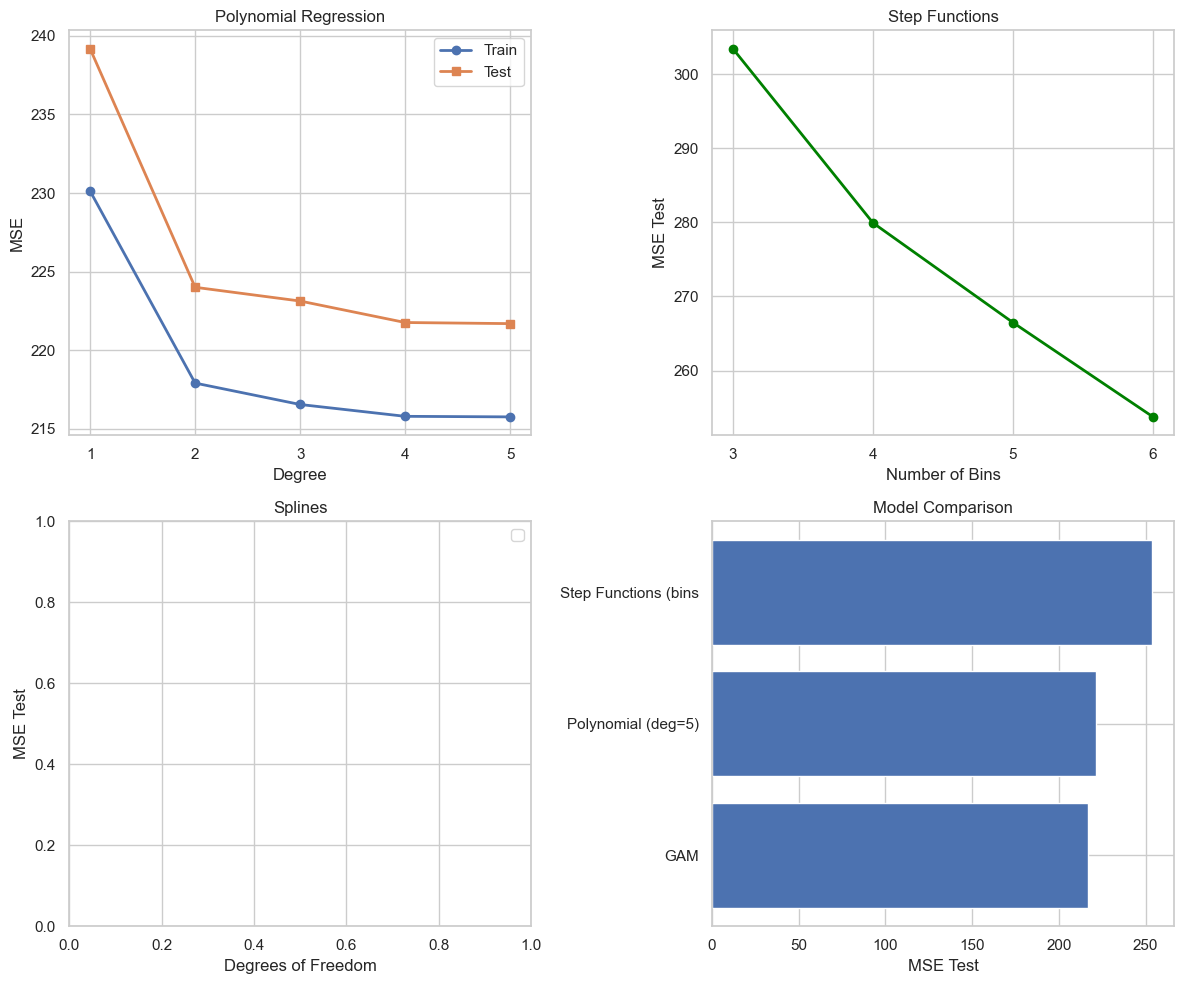

In [ ]:
# ====================================================================
# 7. VISUALISATIONS (Style ISLP)
# ====================================================================

# Figure 1: Comparaison MSE
fig, axes = subplots(2, 2, figsize=(12, 10))

# Polynomial
axes[0, 0].plot(degrees, poly_mse_train, 'o-', label='Train', lw=2)
axes[0, 0].plot(degrees, poly_mse_test, 's-', label='Test', lw=2)
axes[0, 0].set_xlabel('Degree')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('Polynomial Regression')
axes[0, 0].legend()
axes[0, 0].set_xticks(degrees)

# Step functions
if len(step_mse_test) > 0:
    valid_steps = [mse for mse in step_mse_test if mse != np.inf]
    valid_bins = [n_bins_list[i] for i, mse in enumerate(step_mse_test) if mse != np.inf]
    if len(valid_steps) > 0:
        axes[0, 1].plot(valid_bins, valid_steps, 'o-', color='green', lw=2)
        axes[0, 1].set_xlabel('Number of Bins')
        axes[0, 1].set_ylabel('MSE Test')
        axes[0, 1].set_title('Step Functions')
        axes[0, 1].set_xticks(valid_bins)

# Splines
if len(spline_mse_test) > 0:
    valid_splines = [mse for mse in spline_mse_test if mse != np.inf]
    valid_df = [df_list[i] for i, mse in enumerate(spline_mse_test) if mse != np.inf]
    if len(valid_splines) > 0:
        axes[1, 0].plot(valid_df, valid_splines, 'o-', color='orange', lw=2, label='B-Splines')
        
if len(ns_mse_test) > 0:
    valid_ns = [mse for mse in ns_mse_test if mse != np.inf]
    valid_df_ns = [df_list_ns[i] for i, mse in enumerate(ns_mse_test) if mse != np.inf]
    if len(valid_ns) > 0:
        axes[1, 0].plot(valid_df_ns, valid_ns, 's-', color='red', lw=2, label='Natural Splines')

axes[1, 0].set_xlabel('Degrees of Freedom')
axes[1, 0].set_ylabel('MSE Test')
axes[1, 0].set_title('Splines')
axes[1, 0].legend()

# Comparaison finale
methods_short = [m[:20] for m in results_df['Méthode']]
axes[1, 1].barh(methods_short, results_df['MSE Test'])
axes[1, 1].set_xlabel('MSE Test')
axes[1, 1].set_title('Model Comparison')

fig.tight_layout()
plt.show()

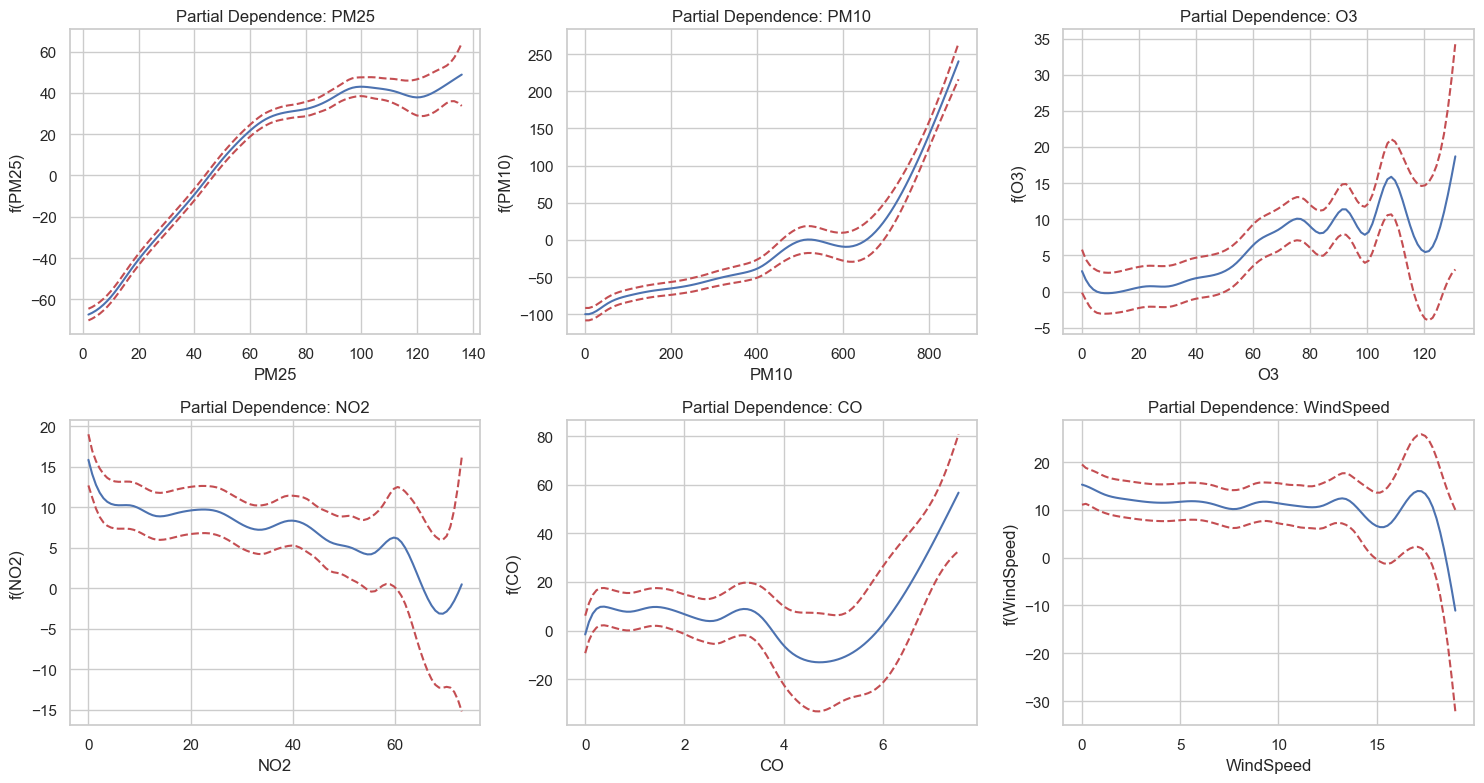

In [161]:
# Figure 2: Partial dependence plots (GAM)
fig, axes = subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    
    axes[i].plot(XX[:, i], pdep)
    axes[i].plot(XX[:, i], confi, c='r', ls='--')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(f'f({feature})')
    axes[i].set_title(f'Partial Dependence: {feature}')

fig.tight_layout()
plt.show()

In [163]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('data/training_data_imputed.csv')
# Séparation X / y
target = 'AQI'
X = df.drop(columns=[target, 'DataCreationDate'])  # on retire la date
y = df[target]

# Colonnes catégorielles et numériques
cat_cols = ['WindDirec']
num_cols = X.drop(columns=cat_cols).columns.tolist()

# Préprocessing : encoder et scaler
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


In [ ]:
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

degrees = [1, 2, 3]
cv_errors = []

for d in degrees:
    pipeline = Pipeline([
        ('preproc', preprocessor),
        ('poly', PolynomialFeatures(degree=d, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
    mse = -cross_val_score(
        pipeline, X, y,
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1
    ).mean()
    
    cv_errors.append(mse)
    print(f"Degré {d} → MSE CV : {mse:.2f}")
"""

Degré 1 → MSE CV : 69.47
Degré 2 → MSE CV : 51.57
Degré 3 → MSE CV : nan


In [ ]:
"""
best_degree = degrees[np.argmin(cv_errors)]
print("➡ Degré optimal :", best_degree) 
""" 


➡ Degré optimal : 3


In [171]:
"""

best_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('linreg', LinearRegression())
])

best_pipeline.fit(X, y)
"""

"\n\nbest_pipeline = Pipeline([\n    ('preproc', preprocessor),\n    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),\n    ('linreg', LinearRegression())\n])\n\nbest_pipeline.fit(X, y)\n"

In [170]:
"""
feature_names = best_pipeline.named_steps['poly'].get_feature_names_out(
    preprocessor.get_feature_names_out()
)

coef_df = pd.DataFrame({'Feature': feature_names, 'Coef': coef})
coef_df = coef_df.sort_values(by='Coef', key=abs, ascending=False)
print(coef_df.head(20))
"""

"\nfeature_names = best_pipeline.named_steps['poly'].get_feature_names_out(\n    preprocessor.get_feature_names_out()\n)\n\ncoef_df = pd.DataFrame({'Feature': feature_names, 'Coef': coef})\ncoef_df = coef_df.sort_values(by='Coef', key=abs, ascending=False)\nprint(coef_df.head(20))\n"